In [224]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

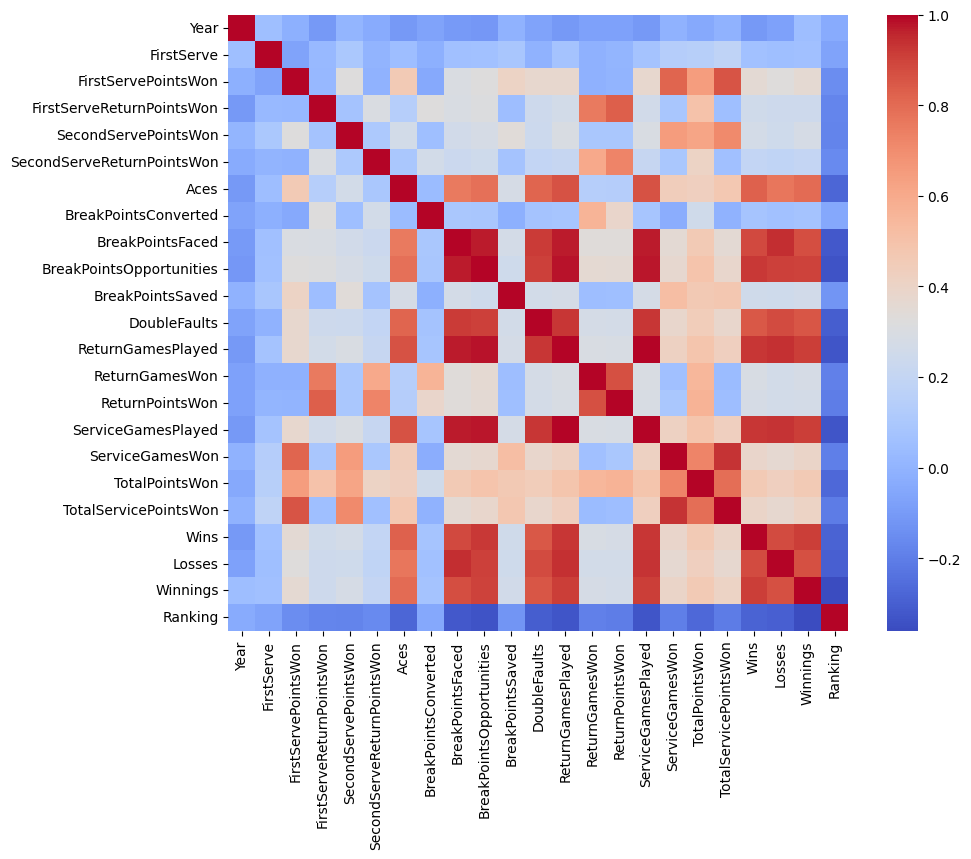

In [225]:
tennis = pd.read_csv('tennis_stats.csv')
tennis_num = tennis.select_dtypes(include=['int', 'float'])
correlation_matrix = tennis_num.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm')
plt.show()

In [226]:
x_attribute = 'Aces'
y_attribute = 'ServiceGamesPlayed'
x = tennis[[x_attribute]]
y = tennis[[y_attribute]]

train_x, test_x, train_y, test_y = train_test_split(x, y, train_size=0.8, test_size=0.2)

lr = LinearRegression()
lr.fit(train_x, train_y)


LinearRegression()

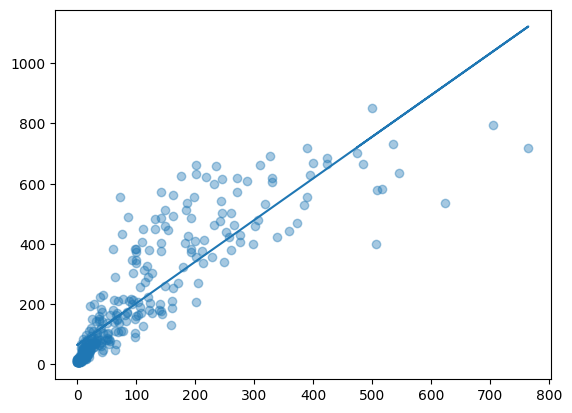

In [227]:
y_predict = lr.predict(test_x)
plt.plot(test_x, np.array([lr.coef_[0][0] * x + lr.intercept_[0] for x in np.array(test_x).flatten()]), '-')
plt.scatter(test_x, test_y, alpha=0.4)
plt.show()

In [228]:
test_y_series = test_y[y_attribute].reset_index(drop='index')
y_predict_series = pd.Series(y_predict.flatten().flatten())
residual = test_y_series - y_predict_series
print(sum(residual**2))

3515216.893753307


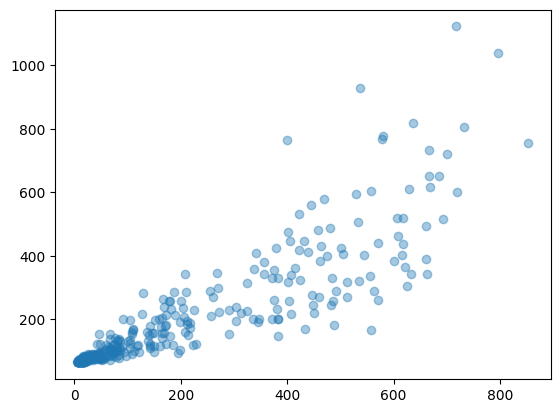

In [229]:
plt.scatter(test_y, y_predict, alpha=0.4)
plt.show()

In [233]:
def get_correlation_coefficient(att1: str, att2: str):
    new_x = tennis_num[[att1, att2]]
    new_y = tennis_num[['Winnings']]
    train_x, test_x, train_y, test_y = train_test_split(new_x, new_y, train_size=0.8, test_size=0.2)
    mlr = LinearRegression()
    mlr.fit(train_x, train_y)
    y_predict2 = mlr.predict(test_x)
    test_y_array = test_y.values.flatten()
    correlation_matrix = np.corrcoef(test_y_array, y_predict2.flatten())
    return correlation_matrix[0, 1]

best_combs = []

In [231]:
from itertools import combinations

tennis_num_columns = list(tennis_num.columns)
tennis_num_columns.remove('Winnings')

combs = list(combinations(tennis_num_columns, 2))
coeffs = []

for comb in combs:
    coef = get_correlation_coefficient(comb[0], comb[1])
    if coef != np.NaN:
        coeffs.append(coef)

coeffs = pd.DataFrame({'coefs': coeffs}).sort_values('coefs', ascending=False)
coeffs = coeffs.coefs.nlargest()
for i in coeffs.index:
    if combs[i] not in best_combs:
        best_combs.append(combs[i])

best_combs

[('BreakPointsConverted', 'ReturnGamesPlayed'),
 ('BreakPointsSaved', 'Wins'),
 ('Aces', 'ReturnGamesPlayed'),
 ('ReturnGamesPlayed', 'Wins'),
 ('TotalServicePointsWon', 'Wins')]

In [232]:
best_combs = np.array(best_combs, dtype='object')
unique_values = np.unique(best_combs)
unique_values

array(['Aces', 'BreakPointsConverted', 'BreakPointsSaved',
       'ReturnGamesPlayed', 'TotalServicePointsWon', 'Wins'], dtype='<U21')